# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 1

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  10 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash;  50 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import torchviz

import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.autograd import grad
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_recall_fscore_support as all_metrics
from sklearn.metrics import accuracy_score

from collections import defaultdict

from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

from IPython.display import clear_output

In [3]:
sns.set_theme(palette='Set2', font_scale=1.2)
# %matplotlib inline

### Задача 1. Дифференцирование

Для функции

$$ f(x, y, z)=\left(\frac{y^4}{1+e^{-x}}\right)^3 + z$$

С помощью Pytorch:

- постройте вычислительный граф с возможностью считать производные по x, y.

- выведите все узлы полученного графа и их атрибуты (рассмотренные на лекции)

- объясните, почему атрибуты принимают такие значения

Для точки (1, 3, 2):

- посчитайте для функции все возможные первые частные производные методом backward()

- посчитайте для функции все возможные вторые частные производные

In [4]:
def f(x, y, z):
    return ((y ** 4) / (1 + torch.exp(-x))) ** 3 + z

In [5]:
point = (1., 3., 2.)

x, y, z = (
    torch.tensor(point[0], requires_grad=True)
    , torch.tensor(point[1], requires_grad=True)
    , torch.tensor(point[2], requires_grad=False)
)
 
ans = f(x, y, z)
ans.backward()

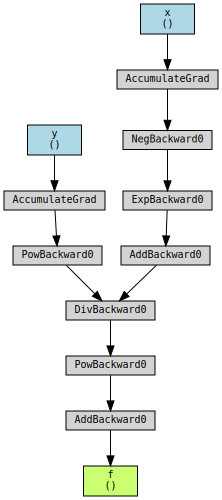

In [6]:
torchviz.make_dot(ans, params={'x': x, 'y': y, 'f': ans})

Выведем и объясним значения параметров узлов вычислительного графа.

In [7]:
print(
    'x: ', x.requires_grad, '\n',
    'y: ', y.requires_grad, '\n',
    'z: ', z.requires_grad, '\n',
    'f: ', ans.requires_grad, '\n',
    sep='',
)

x: True
y: True
z: False
f: True



Видим, что градиенты будут считаться по всем узлам, кроме `z`. Именно этого от нас и хотели в задаче

In [8]:
print(
    'x: ', x.data.item(), '\n',
    'y: ', y.data.item(), '\n',
    'z: ', z.data.item(), '\n',
    'f: ', ans.data.item(), '\n',
    sep='',
)

x: 1.0
y: 3.0
z: 2.0
f: 207642.3125



Это значения в узлах графа при прямом проходе. В вершинах `x`, `y`, `z` они такие, потому что именно эта точка была подана на вход нашего графа. Значение в узле `f` &mdash; это значение нашей функции в точке, пришедшей на вход вычислительного графа.


In [9]:
print(
    'x: ', x.grad, '\n',
    'y: ', y.grad, '\n',
    'z: ', z.grad, '\n',
    'f: ', ans.grad, '\n',
    sep='',
)

x: tensor(167529.2500)
y: tensor(830561.2500)
z: None
f: None



C:\Users\korot\AppData\Local\Temp\ipykernel_21808\479669968.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  'f: ', ans.grad, '\n',


В атрибуте `.grad` лежат градиенты. У переменной `z` там ничего не лежит, потому что ранее мы не захотели считать по ней градиенты и написали `requires_grad=False`. У переменной  `f` там ничего не лежит, поскольку она не является листом в вычислительном графе. В этом можно убедиться, позвав соответствующий метод:

In [10]:
print(
    'x: ', x.is_leaf, '\n',
    'y: ', y.is_leaf, '\n',
    'z: ', z.is_leaf, '\n',
    'f: ', ans.is_leaf, '\n',
    sep='',
)

x: True
y: True
z: True
f: False



In [11]:
point = [1., 3., 2.]

x, y, z = (
    torch.tensor(point[0], requires_grad=True)
    , torch.tensor(point[1], requires_grad=True)
    , torch.tensor(point[2], requires_grad=True)
)
 
ans = f(x, y, z)
ans.backward()

Все первые частные производные

In [12]:
print(
    'x: ', x.grad, '\n',
    'y: ', y.grad, '\n',
    'z: ', z.grad, '\n',
    sep='',
)

x: tensor(167529.2500)
y: tensor(830561.2500)
z: tensor(1.)



Теперь посчитаем все вторые частные производные:

In [13]:
H = torch.autograd.functional.hessian(
    f,
    inputs=(
        torch.tensor(1.),
        torch.tensor(3.),
        torch.tensor(2.)
    )
)

In [14]:
for r in H:
    for t in r:
        print(str(round(t.item(), 3)).ljust(8), end='\t')
    print('\n', end='')

12692.979	670117.0	0.0     	
670117.0	3045391.0	0.0     	
0.0     	0.0     	0.0     	


### Задача 2.
#### Профиль физика

Скачайте [датасет](https://disk.yandex.ru/d/LighhESdTbYk6Q), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)

In [15]:
df = pd.read_csv('Z_boson.csv')
df = df.drop(['Unnamed: 0', 'Run', 'Event'], axis=1)
df = df.dropna()

lb = LabelBinarizer()
df['class'] = lb.fit_transform(df['class'])

Удалите столбцы 'Unnamed: 0	', 'Run' и 'Event', так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

In [16]:
df.head()

,pt1,eta1,phi1,Q1,pt2,eta2,phi2,Q2,class
0,42.9130,-1.3248,-3.0057,-1,42.2897,-0.6624,0.3485,1,1
1,39.8744,-0.0057,-0.7744,-1,36.3997,1.3710,2.2952,1,0
2,72.9296,-0.4162,0.9198,1,39.5410,-0.2680,-1.4629,1,0
3,33.4436,0.3063,-1.6034,1,27.2395,-1.6182,1.5315,-1,0
4,43.9826,0.4276,-0.3876,-1,29.7856,-0.3080,2.8965,1,1


Убедитесь, что классы сбалансированны.

<Axes: xlabel='class', ylabel='count'>

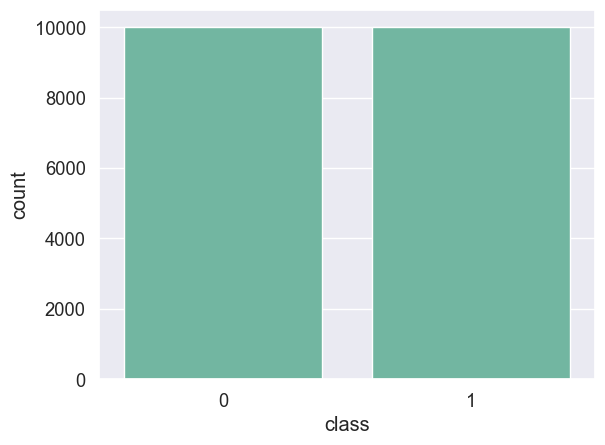

In [17]:
sns.countplot(data=df, x='class')

Прям ровненько сбалансированы

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец 'class') к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.

In [18]:
class_lim_proba = 0.5 # критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [19]:
X = df.drop(['class'], axis=1)
y = df['class']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Далее сформируйте датасет в pytorch-обертке

In [54]:
class MyDataset():
    def __init__(self, X_data, y_data):
        self.X = X_data
        self.y = y_data

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx].ravel().astype(np.float32), self.y[idx].astype(np.float32)

In [55]:
train_dataset = MyDataset(X_train, y_train.values)
val_dataset = MyDataset(X_val, y_val.values)

In [56]:
X_train[0].astype(np.float32)

array([ 0.07147199,  0.69323397, -1.5800793 , -0.99421674,  0.1914568 ,
        0.21979217, -0.04450163,  0.9846183 ], dtype=float32)

In [57]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
)
val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=32,
    shuffle=False,
)

In [58]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([1, 1, 1])

a > 1

tensor([False,  True,  True])

Напишите вспомогательные функции, в одной из которых будет проходить обучение, а во вторй - валидация. Также в отдельной функцией можно описать отрисовку кривых обучения. На одном графике расположите значение функции потерь на трейне и валидации, а на другом -- значение метрики качества на ваш выбор, также для трейна и валидации)

In [178]:
from torch import mode


def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    fig = plt.figure(figsize=(20,7))

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Точность', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.xlabel('эпоха', fontsize=15)
    plt.legend()


def train_epoch(model, criterion, opt, train_loader):
    '''
    Проход по данным для обучения в одной эпохе
    '''
    train_loss = 0
    train_acc = 0
    train_size = 0

    model.train()

    for X_batch, y_batch in train_loader:
        y_proba = model(X_batch)
        loss = criterion(y_proba, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()

        train_loss += loss.detach() * len(y_batch)
        y_pred = y_proba > class_lim_proba
        train_acc += (y_batch == y_pred.T.ravel()).sum()
        train_size += len(y_batch)
    
    train_loss = train_loss.cpu().numpy() / train_size
    train_acc = train_acc.cpu().numpy() / train_size

    model.eval()

    return train_loss, train_acc


def val_epoch(model, criterion, val_loader):
    '''
    Валидация на одной эпохе
    '''
    val_loss = 0
    val_acc = 0
    val_size = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_proba = model(X_batch)
            loss = criterion(y_proba, y_batch)

            val_loss += loss.detach() * len(y_batch)
            y_pred = y_proba > class_lim_proba
            val_acc += (y_batch == y_pred.T.ravel()).sum()
            val_size += len(y_batch)

        # Подсчитываем лоссы и сохраняем в "историю"
    val_loss = val_loss.cpu().numpy() / val_size
    val_acc = val_acc.cpu().numpy() / val_size

    return val_loss, val_acc

Создание модели

In [179]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()

        self.linear1 = nn.Linear(8, 16)
        self.linear2 = nn.Linear(16, 16)
        self.linear3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.linear1(nn.ReLU()(x))
        x = self.linear2(nn.ReLU()(x))
        x = self.linear3(nn.ReLU()(x))

        return x

Обучение

In [180]:
def train(
    model,
    criterion,
    optimizer,
    train_loader,
    val_loader,
    num_epochs,
):

    start_time = time.time()

    history = defaultdict(lambda: defaultdict(list))
    best_val_acc = 0.

    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, criterion, optimizer, train_loader)
        val_loss, val_acc = val_epoch(model, criterion, val_loader)
        
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)

        print("Эпоха {} из {}, время {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("loss на обучении (на итерации): \t{:.6f}".format(train_loss))
        print("loss на валидации (на итерации): \t{:.6f}".format(val_loss))
        print("accuracy на обучении: \t\t\t{:.2f} %".format(train_acc * 100))
        print("accuracy на валидации: \t\t\t{:.2f} %".format(val_acc * 100))
        print()
    
    return history

Эпоха 1 из 100, время 0.496s
loss на обучении (на итерации): 	0.267184
loss на валидации (на итерации): 	0.255313
accuracy на обучении: 			48.02 %
accuracy на валидации: 			49.65 %

Эпоха 2 из 100, время 1.007s
loss на обучении (на итерации): 	0.253010
loss на валидации (на итерации): 	0.251989
accuracy на обучении: 			48.37 %
accuracy на валидации: 			49.30 %

Эпоха 3 из 100, время 1.544s
loss на обучении (на итерации): 	0.251484
loss на валидации (на итерации): 	0.250957
accuracy на обучении: 			48.20 %
accuracy на валидации: 			46.12 %

Эпоха 4 из 100, время 2.130s
loss на обучении (на итерации): 	0.250971
loss на валидации (на итерации): 	0.250726
accuracy на обучении: 			47.83 %
accuracy на валидации: 			47.38 %

Эпоха 5 из 100, время 2.695s
loss на обучении (на итерации): 	0.250765
loss на валидации (на итерации): 	0.250411
accuracy на обучении: 			47.89 %
accuracy на валидации: 			45.00 %

Эпоха 6 из 100, время 3.229s
loss на обучении (на итерации): 	0.250564
loss на валидации (

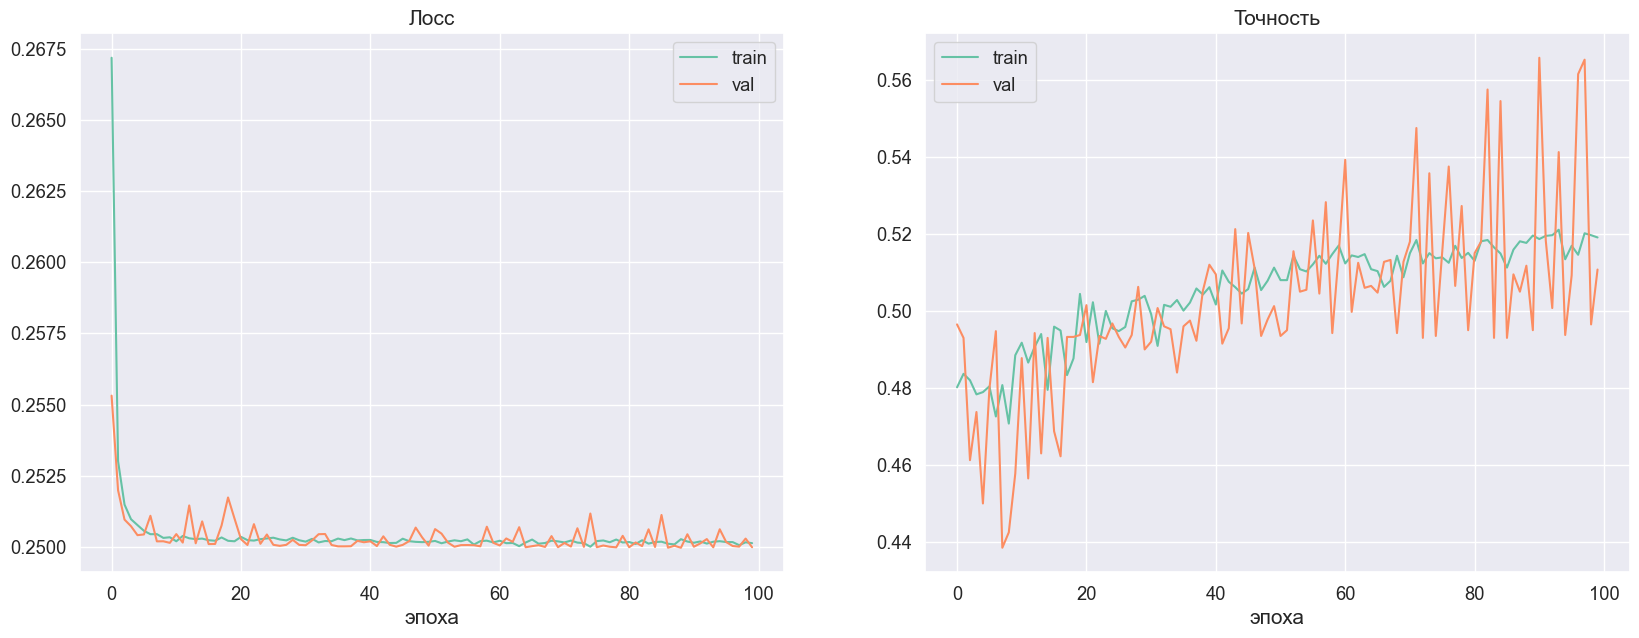

In [184]:
model = SimpleModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

h = train(model, criterion, optimizer, train_loader, val_loader, 100)

plot_learning_curves(h)

Тестирование

In [183]:
model.eval()
model.cpu()

SimpleModel(
  (linear1): Linear(in_features=8, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)

**Выводы:**